In [3]:
import numpy as np
import pandas as pd 
import datetime as dt
import yfinance as yf 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

In [5]:
# Set time from to a certain number of years 
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365 * years)

In [9]:
# Creating a list of tickers 
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [17]:
# Download the daily adjusted close prices for the tickers
# We use adjusted close prices as they account for dividends, stocks splits and
# our analysis will be more accurate 

# Initialize an empty DataFrame to store the adjusted close prices
adj_close_df = pd.DataFrame()

# Loop through each ticker and fetch the data
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

# Print the DataFrame
print(adj_close_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2010-01-04   86.026451  51.246937  109.800003   40.546196   43.747627
2010-01-05   86.254158  51.396763  109.699997   40.546196   43.915562
2010-01-06   86.314888  51.377193  111.510002   40.301624   43.976639
2010-01-07   86.679276  51.338146  110.820000   40.327835   44.159832
2010-01-08   86.967720  51.390259  111.370003   40.659752   44.304871
...                ...        ...         ...         ...         ...
2024-12-20  591.150024  71.976257  242.100006  517.824951  292.339020
2024-12-23  594.690002  71.747002  240.960007  522.869995  294.000000
2024-12-24  601.299988  71.849998  241.440002  529.960022  297.119995
2024-12-26  601.340027  71.900002  243.070007  529.599976  297.290009
2024-12-27  595.010010  71.750000  241.399994  522.559998  294.070007

[3772 rows x 5 columns]


In [19]:
# Calculate the daily log returns and drop any NAs
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2010-01-05  0.002643  0.002919 -0.000911  0.000000  0.003831
2010-01-06  0.000704 -0.000381  0.016365 -0.006050  0.001390
2010-01-07  0.004213 -0.000760 -0.006207  0.000650  0.004157
2010-01-08  0.003322  0.001015  0.004951  0.008197  0.003279
2010-01-11  0.001395  0.000380  0.013201 -0.004090  0.001378
...              ...       ...       ...       ...       ...
2024-12-20  0.011939  0.003051  0.010380  0.008695  0.011316
2024-12-23  0.005970 -0.003190 -0.004720  0.009696  0.005666
2024-12-24  0.011054  0.001435  0.001990  0.013469  0.010556
2024-12-26  0.000067  0.000696  0.006728 -0.000680  0.000572
2024-12-27 -0.010582 -0.002088 -0.006894 -0.013382 -0.010890

[3771 rows x 5 columns]


In [ ]:
# Create a function that will be used to calculate portfolio expected return 
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

In [21]:
# Create a function that will help us calculate portfolio standard deviation 
def standard_deviation (weights, cov_matrix):
    variance = weights.T @cov_matrix @weights 
    return np.sqrt(variance)

In [25]:
# Create a covariance matrix for all the securities 
cov_matrix = log_returns.cov()
print (cov_matrix)

              SPY           BND       GLD       QQQ           VTI
SPY  1.160648e-04  1.335204e-07  0.000006  0.000129  1.185087e-04
BND  1.335204e-07  9.340009e-06  0.000009  0.000001  3.322877e-07
GLD  5.807619e-06  9.012024e-06  0.000096  0.000007  6.367205e-06
QQQ  1.290826e-04  1.017271e-06  0.000007  0.000166  1.318427e-04
VTI  1.185087e-04  3.322877e-07  0.000006  0.000132  1.219807e-04


In [37]:
# Create an equally weighted portfolio, find total portfolio expected returns and 
# standard deviation 
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

def standard_deviation (weights, cov_matrix):
    variance = weights.T @cov_matrix @weights 
    return np.sqrt(variance)

portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return (weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

In [39]:
# Create a function that gives a random Z-score based on normal distribution 
def random_z_score():
    return np.random.normal(0,1)

In [49]:
# Create a function to calculate scenarioGainLoss
days = 20

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

In [51]:
# Run 1000 simulations 
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))
    


In [53]:
# Specifiy a confidence interval and calculate VAR
confidence_interval = 0.95
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

46862.598150408674


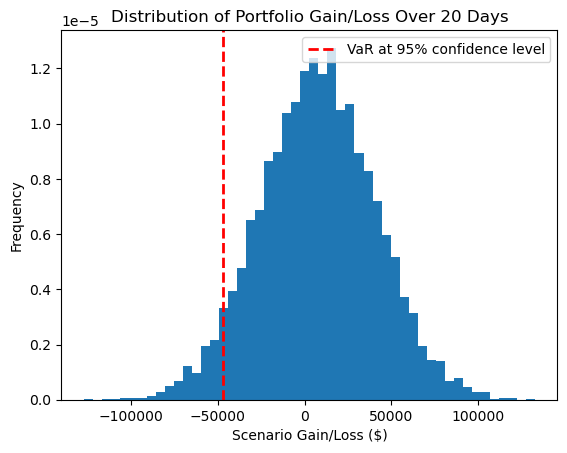

In [57]:
# Plot the results of all 1000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, 
            label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()